# Regular expressions & word tokenization

This chapter will introduce some basic NLP concepts, such as word tokenization and regular expressions to help parse text. You'll also learn how to handle non-English text and more difficult tokenization you might find.

**Common Regex patterns**  

|pattern |matches |example|
|-------|-------|-------|
|\w+ |word| 'Magic'|
|\d |digit| 9|
|\s |space| ' '|
|.* |wildcard| 'username74'|
|+ or * |greedy match| 'aaaaaa'|
|\S |not space| 'no_spaces'|
|[a-z] |lowercase group| 'abcdefg'|
|[A-Za-z]+|upper and lowercase English alphabet|'ABCDEfghijk'|
|[0-9] |numbers from 0 to 9 |9|
|[A-Za-z\-\.]+ |upper and lowercase English alphabet, - and .|'MyWebsite.com'|
|(a-z)| a, - and z| 'a-z'|
|(\s+l,)| spaces or a comma| ','|

## Practicing regular expressions: re.split() and re.findall()

Now you'll get a chance to write some regular expressions to match digits, strings and non-alphanumeric characters. Take a look at my_string first by printing it in the IPython Shell, to determine how you might best match the different steps.

Note: It's important to prefix your regex patterns with r to ensure that your patterns are interpreted in the way you want them to. Else, you may encounter problems to do with escape sequences in strings. For example, "\n" in Python is used to indicate a new line, but if you use the r prefix, it will be interpreted as the raw string "\n" - that is, the character "\" followed by the character "n" - and not as a new line.

The regular expression module re has already been imported for you.

Remember from the video that the syntax for the regex library is to always to pass the pattern first, and then the string second.

In [9]:
import re

my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

# Split my_string on each sentence ending. To do this:
# Write a pattern to match sentence endings (.?!): sentence_endings
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))


["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']
['Let', 'RegEx', 'Won', 'Can', 'Or']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']
['4', '19']


## Word tokenization with NLTK

Here, you'll be using the first scene of Monty Python's Holy Grail, which has been pre-loaded as scene_one. Feel free to check it out in the IPython Shell!

Your job in this exercise is to utilize word_tokenize and sent_tokenize from nltk.tokenize to tokenize both words and sentences from Python strings - in this case, the first scene of Monty Python's Holy Grail.

In [10]:
scene_one = """SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop clop clop] 
SOLDIER #1: Halt!  Who goes there?
ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!
SOLDIER #1: Pull the other one!
ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.
SOLDIER #1: What?  Ridden on a horse?
ARTHUR: Yes!
SOLDIER #1: You're using coconuts!
ARTHUR: What?
SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.
ARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--
SOLDIER #1: Where'd you get the coconuts?
ARTHUR: We found them.
SOLDIER #1: Found them?  In Mercea?  The coconut's tropical!
ARTHUR: What do you mean?
SOLDIER #1: Well, this is a temperate zone.
ARTHUR: The swallow may fly south with the sun or the house martin or the plover may seek warmer climes in winter, yet these are not strangers to our land?
SOLDIER #1: Are you suggesting coconuts migrate?
ARTHUR: Not at all.  They could be carried.
SOLDIER #1: What?  A swallow carrying a coconut?
ARTHUR: It could grip it by the husk!
SOLDIER #1: It's not a question of where he grips it!  It's a simple question of weight ratios!  A five ounce bird could not carry a one pound coconut.
ARTHUR: Well, it doesn't matter.  Will you go and tell your master that Arthur from the Court of Camelot is here.
SOLDIER #1: Listen.  In order to maintain air-speed velocity, a swallow needs to beat its wings forty-three times every second, right?
ARTHUR: Please!
SOLDIER #1: Am I right?
ARTHUR: I'm not interested!
SOLDIER #2: It could be carried by an African swallow!
SOLDIER #1: Oh, yeah, an African swallow maybe, but not a European swallow.  That's my point.
SOLDIER #2: Oh, yeah, I agree with that.
ARTHUR: Will you ask your master if he wants to join my court at Camelot?!
SOLDIER #1: But then of course a-- African swallows are non-migratory.
SOLDIER #2: Oh, yeah...
SOLDIER #1: So they couldn't bring a coconut back anyway...  [clop clop clop] 
SOLDIER #2: Wait a minute!  Supposing two swallows carried it together?
SOLDIER #1: No, they'd have to have it on a line.
SOLDIER #2: Well, simple!  They'd just use a strand of creeper!
SOLDIER #1: What, held under the dorsal guiding feathers?
SOLDIER #2: Well, why not?"""

In [19]:
import re
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')

# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])

# Make a set of unique tokens in the entire scene by using word_tokenize() 
# on scene_one and then converting it into a set using set(): unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)


{'knights', 'No', 'What', 'You', "'", 'not', 'Am', 'dorsal', 'found', 'wings', 'using', 'ask', 'goes', 'needs', 'horse', 'here', 'wants', 'an', 'line', 'coconuts', 'held', 'swallow', 'Arthur', 'our', 'It', 'SCENE', 'castle', 'ridden', 'you', 'velocity', 'non-migratory', 'temperate', 'guiding', 'maybe', 'Pendragon', '#', 'will', 'are', '1', 'suggesting', 'Well', 'use', 'of', 'do', 'plover', 'Wait', "n't", 'got', 'coconut', 'house', "'s", 'under', 'all', "'d", 'carrying', 'King', 'snows', 'So', 'Whoa', 'where', 'The', 'if', 'swallows', 'SOLDIER', 'course', 'they', 'pound', 'But', 'Yes', 'length', 'sun', 'by', 'air-speed', 'ARTHUR', 'and', 'but', 'then', 'feathers', 'sovereign', "'em", 'must', 'tropical', 'search', 'Uther', 'be', 'minute', '[', 'Halt', 'have', 'A', 'Will', 'order', 'ratios', 'yet', 'beat', '...', 'land', 'the', 'kingdom', 'strand', 'my', 'together', 'there', 'warmer', 'strangers', 'weight', 'does', 'it', ',', 'on', 'speak', 'other', 'Who', 'master', 'south', 'Listen', 'Th

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jacob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## More regex with re.search()

In this exercise, you'll utilize ```re.search()``` and ```re.match()``` to find specific tokens. Both search and match expect regex patterns, similar to those you defined in an earlier exercise. You'll apply these regex library methods to the same Monty Python text from the ```nltk``` corpora.

You have both ```scene_one``` and ```sentences``` available from the last exercise; now you can use them with ```re.search()``` and ```re.match()``` to extract and match more text.

In [20]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search('coconuts', scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

580 588


In [21]:
# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))

<re.Match object; span=(9, 32), match='[wind] [clop clop clop]'>


In [23]:
# Find the script notation at the beginning of the fourth sentence and print it
# Create a pattern to match the script notation (e.g. Character:), assigning the result to pattern2.
# Remember that you will want to match any words or spaces that precede the : (such as the space within SOLDIER #1:).
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, sentences[3]))

<re.Match object; span=(0, 8), match='\nARTHUR:'>


## Regex with NLTK tokenization

Twitter is a frequently used source for NLP text and tasks. In this exercise, you'll build a more complex tokenizer for tweets with hashtags and mentions using `nltk` and `regex`. The `nltk.tokenize.TweetTokenizer` class gives you some extra methods and attributes for parsing tweets.

Here, you're given some example tweets to parse using both `TweetTokenizer` and `regexp_tokenize` from the `nltk.tokenize` module. These example tweets have been pre-loaded into the variable `tweets`. Feel free to explore it in the IPython Shell!

Unlike the syntax for the regex library, with `nltk_tokenize()` you pass the pattern as the second argument.

In [25]:
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer

In [29]:
tweets = ['This is the best #nlp exercise ive found online! #python', '#NLP is super fun! <3 #learning', 'Thanks @datacamp :) #nlp #python']
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"
# Use the pattern on the first tweet in the tweets list
hashtags = regexp_tokenize(tweets[0], pattern1)
print(hashtags)

# Write a pattern that matches both mentions (@) and hashtags
pattern2 = r"([@#]\w+)"
# Use the pattern on the last tweet in the tweets list
mentions_hashtags = regexp_tokenize(tweets[-1], pattern2)
print(mentions_hashtags)

# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

['#nlp', '#python']
['@datacamp', '#nlp', '#python']
[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


## Non-ascii tokenization

In this exercise, you'll practice advanced tokenization by tokenizing some non-ascii based text. You'll be using German with emoji!

Here, you have access to a string called `german_text`, which has been printed for you in the Shell. Notice the emoji and the German characters!


Unicode ranges for emoji are:

`('\U0001F300'-'\U0001F5FF'), ('\U0001F600-\U0001F64F'), ('\U0001F680-\U0001F6FF'), and ('\u2600'-\u26FF-\u2700-\u27BF')`.

In [45]:
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

from nltk.tokenize import regexp_tokenize, word_tokenize

# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

# Tokenize and print only capital words
capital_words = r"[A-Z|Ü]\w+"
print(regexp_tokenize(german_text, capital_words))

# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))


['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']
['Wann', 'Pizza', 'Und', 'Über']
['🍕', '🚕']


## Charting word length with nltk

Try using your new skills to find and chart the number of words per line in the script using `matplotlib`. The Holy Grail script is loaded for you, and you need to use regex to find the words per line.

Using list comprehensions here will speed up your computations. For example: `my_lines = [tokenize(l) for l in lines]` will call a function tokenize on each line in the list lines. The new transformed list will be saved in the my_lines variable.

You have access to the entire script in the variable holy_grail. Go for it!

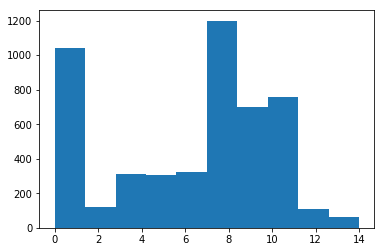

In [53]:
from matplotlib import pyplot as plt 
%matplotlib inline

hamlet = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')

# Split the script into lines: lines
lines = hamlet.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, "\w+") for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()